# Overplotting the position of the Venus transit

- https://docs.sunpy.org/en/stable/generated/gallery/units_and_coordinates/venus_transit.html

How to accurately plot the position of Venus as it transited in front
of the Sun as observed by SDO/AIA.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord, solar_system_ephemeris

import sunpy.map
from sunpy.coordinates import get_body_heliographic_stonyhurst
from sunpy.data.sample import AIA_1600_VENUS_IMAGE

Let's use the sunpy sample data which has an image of the Venus transit.

In [ ]:
aiamap = sunpy.map.Map(AIA_1600_VENUS_IMAGE)

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,1600.0 Angstrom
Wavelength,1600.0 Angstrom
Observation Date,2012-06-06 04:07:29
Exposure Time,2.901224 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[1.218746 1.218746] arcsec / pix
Reference Pixel,[1028.7650145 1022.005005 ] pix

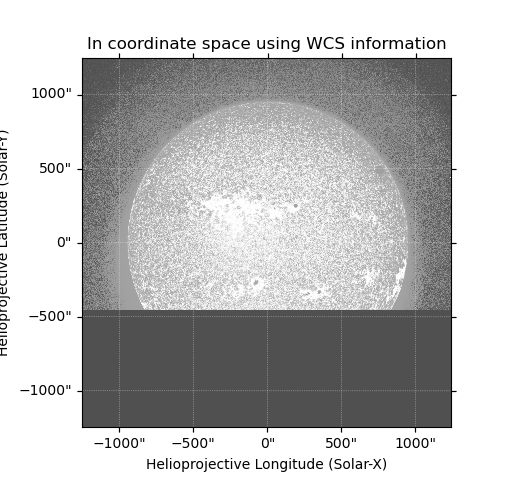
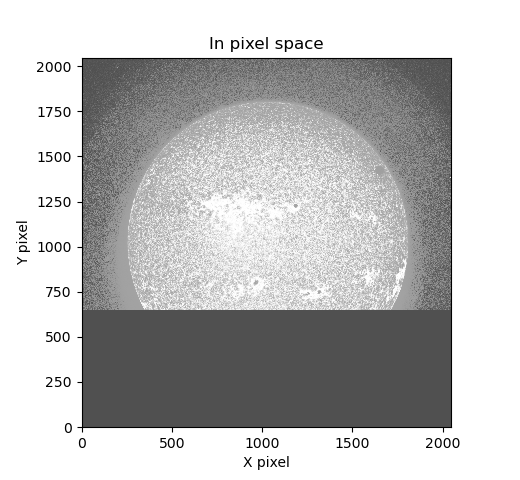
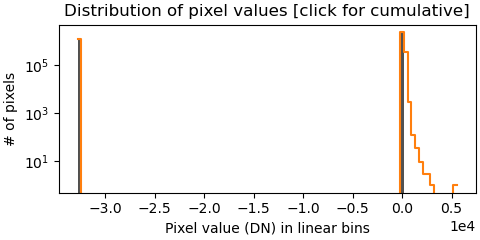
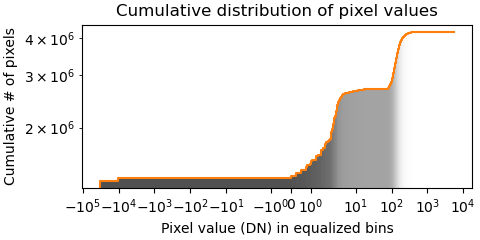

In [ ]:
aiamap

For this example, we require high-precision ephemeris information. The built-in
ephemeris provided by astropy is not accurate enough. This call requires ``jplephem``
to be installed. This will also trigger a download of about ~10 MB.

In [ ]:
solar_system_ephemeris.set('de432s')

<ScienceState solar_system_ephemeris: 'de432s'>

Now we get the position of Venus and convert it into the SDO/AIA coordinates.
The apparent position of Venus accounts for the time it takes for light to
travel from Venus to SDO.

In [ ]:
venus = get_body_heliographic_stonyhurst('venus', aiamap.date, observer=aiamap.observer_coordinate)
venus_hpc = venus.transform_to(aiamap.coordinate_frame)

INFO: Apparent body location accounts for 144.14 seconds of light travel time [sunpy.coordinates.ephemeris]


Let's crop the image with Venus at its center.

In [ ]:
fov = 200 * u.arcsec
bottom_left = SkyCoord(venus_hpc.Tx - fov/2, venus_hpc.Ty - fov/2, frame=aiamap.coordinate_frame)
smap = aiamap.submap(bottom_left, width=fov, height=fov)

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,1600.0 Angstrom
Wavelength,1600.0 Angstrom
Observation Date,2012-06-06 04:07:29
Exposure Time,2.901224 s
Dimension,[165. 166.] pix
Coordinate System,helioprojective
Scale,[1.218746 1.218746] arcsec / pix
Reference Pixel,[-536.2349855 -314.994995 ] pix

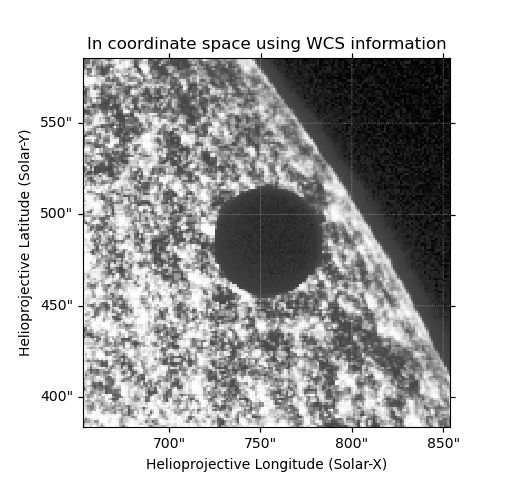
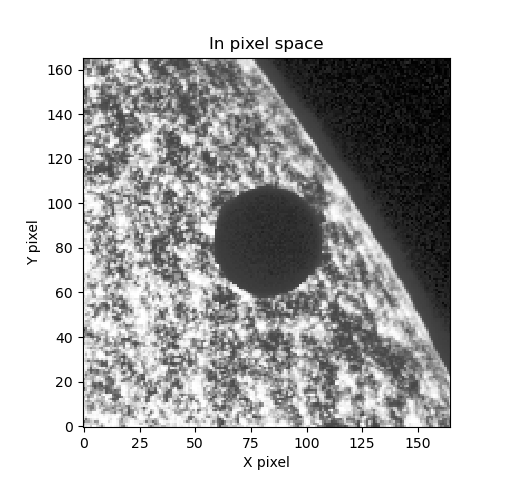
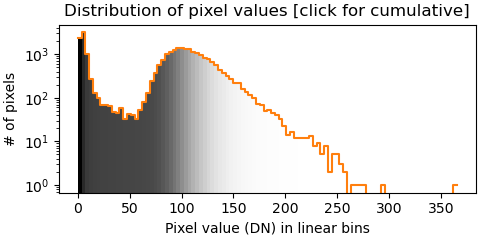
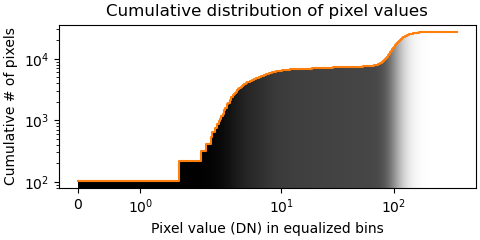

In [ ]:
smap

Let's plot the results.

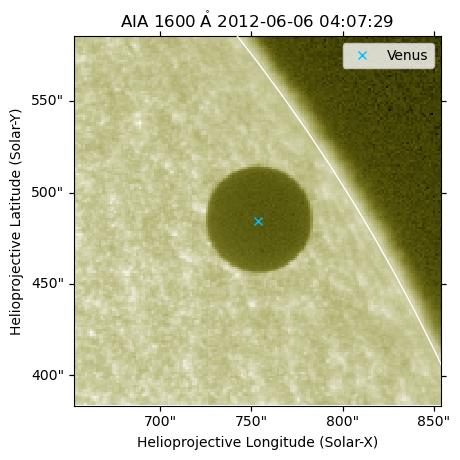

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=smap)
smap.plot(axes=ax)
smap.draw_limb(axes=ax)
ax.grid(False)
ax.plot_coord(venus_hpc, 'x', color='deepskyblue', label='Venus')
ax.legend()

plt.show()